Логистическая регрессия
---

Обработка датасета

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

<Figure size 640x480 with 0 Axes>

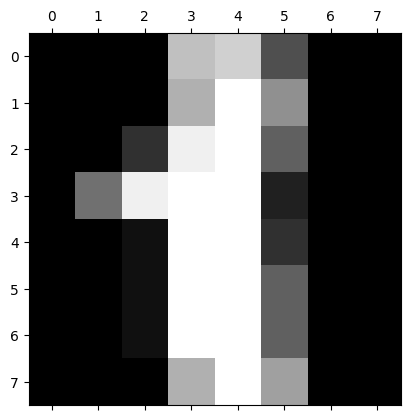

In [24]:
data = load_digits()
plt.gray()
plt.matshow(data.images[1])

In [200]:
X = data['data'] #все массивы объекта объединены в один и так для каждого в датасете
y = (data['target'] >= 5).astype(np.int32) #таргет для каждого массива (объекта)
#КАК РАБОТАЕТ ВТОРАЯ СТРОЧКА????

In [201]:
data.images[0] #так выглядит объект изначально

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [202]:
X[0] #так выглядит тот же объект в X

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print (len(X_train))
print(len(y_train))
print (len(X_test))
print(len(y_test))


1203
1203
594
594


In [204]:
count, axe = X_train.shape

In [205]:
X_train.shape

(1203, 64)

Логистическая регрессия

In [252]:
class Logistic_regression:
    def __init__(self):
        self.w =  np.random.randn(1, axe)
        self.b = np.random.randint(0,11)*0.1
        self.report = 100

    def activation_func(self, z):
        return 1/(1+np.exp(-z))

    def loss_func(self, y_pred, y_actual):
        eps = 1e-10
        loss = 0
        for i in range(len(y_actual)):
            y_act_cl = np.clip(y_actual[i], eps, 1-eps) #лежит на (0,1)
            y_pred_cl = np.clip(y_pred[i], eps, 1-eps)  #лежит на (0,1)
            loss+= (-y_act_cl)*np.log(y_pred_cl)-(1-y_act_cl)*np.log(1-y_pred_cl)
        return loss/len(y_actual)
    
    def z(self, X):
        return np.dot(self.w,X)+self.b 

    def train(self, X_train, y_train, learning_rate = 0.05, epochs = 100):
        self.losses_func_train = []
        self.losses_func_test = []

        for epoch in range(epochs):
            dw = np.zeros(axe) #dL/dw
            db = 0 #dL/db
            for i in range(len(X_train)):
                x_i = X_train[i]
                z_i = self.z(x_i)
                activation_function = self.activation_func(z_i)
                dw += x_i*(activation_function-y_train[i]) 
                db += (activation_function-y_train[i])
            #считаем среднее
            dw = dw/len(X_train)
            db = db/len(X_train)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db

            if epoch%self.report == 0: #выводим значение функции потерь каждые self.report эпох
                self.losses_func_train.append(self.loss_func(self.predict(X_train), y_train))
                self.losses_func_test.append(self.loss_func(self.predict(X_test), y_test))
                print("----------------------------------")
                print(self.losses_func_train[int(epoch/self.report)])
                print(self.losses_func_test[int(epoch/self.report)])
    
    def predict(self, X): #ДОБАВИТЬ ВЕКТОРИЗАЦИЮ В ЦИКЛ ИЛИ СДЕЛАТЬ Ч/З NUMPY
        y_predictioned = []
        for i in range(len(X)):
            y_predictioned.append(self.activation_func(self.z(X[i])))
        return y_predictioned
    
    def predict_object(self, x):
        return self.activation_func(self.z(x))


In [253]:
logres = Logistic_regression()
logres.train(X_train, y_train, epochs=600)

----------------------------------
[8.09225126]
[8.89838568]
----------------------------------
[2.64291178]
[2.53772294]
----------------------------------
[0.81971958]
[0.83971139]
----------------------------------
[0.73125035]
[0.7713984]
----------------------------------
[0.73969746]
[0.74362154]
----------------------------------
[2.50728915]
[2.50305454]


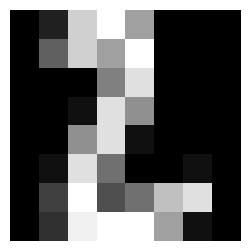

In [254]:
plt.figure(figsize=(3, 3))
plt.imshow(X_test[4].reshape(8, 8), cmap='gray')  # X_train[0] - первая картинка в тренировочном наборе
plt.axis('off')
plt.show()

In [257]:
logres.predict_object(X_test[4])

array([0.01628222])

Возможные улучшения:

*Рассмотрите возможность использования оптимизационных методов, таких как стохастический градиентный спуск (SGD) или его варианты, для более эффективного обучения.

*Используйте проверку на None для X_test и y_test в методе train, чтобы избежать ошибок при их отсутствии.

*Добавьте обработку входных данных, такую как проверка их размерности, чтобы убедиться, что они соответствуют ожиданиям модели.